<a href="https://colab.research.google.com/github/rohithv-21/Hotel-booking-analysis/blob/main/Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Hotel Booking Analysis

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

**Explore and analyze the data to discover important factors that govern the bookings.**

In [1]:
# lets import the libraries required for data analysing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# lets import the data by mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the csv file

file_path ="/content/drive/MyDrive/Colab Notebooks/Capstone Project 1/Rohith.V - Hotel booking analysis EDA/Hotel Bookings.csv"
hotel_booking_analysis_data = pd.read_csv(file_path)

In [4]:
# to get the top 5 rows and bottom 5 from the imported data

hotel_booking_analysis_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel_booking_analysis_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
# lets get more info about numerical data
hotel_booking_analysis_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# find count of number of rows and columns
hotel_booking_analysis_data.shape

(119390, 32)

From the data we have 119390 rows and 32 columns

In [8]:
# lets analyze the data basically

hotel_booking_analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Create a copy of the given dataset, so that our original dataset remains unchanged

In [9]:
# creating the copy of the given data

df = hotel_booking_analysis_data.copy()

In [10]:
# to find the sum of null rows 

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Data cleaning and handling of missing values

Lets find the percentage of null values present in the dataset

In [11]:
# Create a function to find percentage of null values present

def percent_missing(df):
    percent_nan = df.isnull().sum() / len(df) * 100
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending = False)
    return percent_nan 

In [12]:
percent_nan = percent_missing(df)
percent_nan

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

Text(0.5, 0, 'Null value Columns')

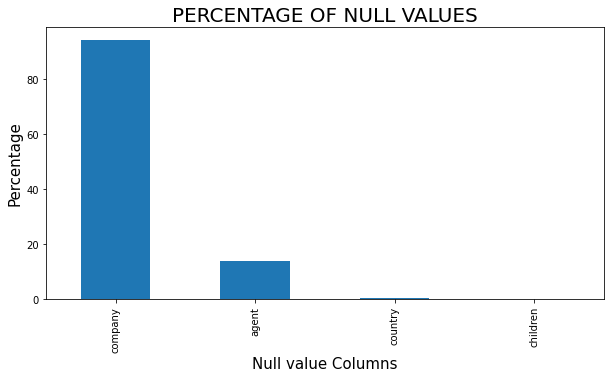

In [13]:
x = percent_nan.plot(figsize = (10,5) , kind = "bar")
plt.title('PERCENTAGE OF NULL VALUES' , fontsize = 20)
plt.ylabel('Percentage' , fontsize = 15)
plt.xlabel('Null value Columns' , fontsize = 15)

**Inference :** Clearly from the graph company column has got 94% and agent column has got 13% of null values where country and children columns has got less than 1%.

Since the company column has got 94% of the null values it is better to drop out this column

In [14]:
df.drop(["company"] ,axis = 1, inplace = True)

In [15]:
df.shape

(119390, 31)

We will fill the agent id with "Agent" and null agent id with "No Agent"

In [16]:
# First we will fill the agent ids with 'Agent'

df.loc[df.agent.isnull()==False,'agent']='Agent'

In [17]:
# Now we will fill the null values present in agent ids with 'No agent'

df.agent.fillna('No agent',inplace=True)

In [18]:
df[["agent"]].head()

,agent
0,No agent
1,No agent
2,No agent
3,Agent
4,Agent


We would fill the missing values in the country coulumns with 'Unknown' since we do not seem to find any references to other columns

In [19]:
df.country.fillna('Unknown',inplace=True)

In [20]:
df["country"]

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

We would fill the missing values in the children column with 0

In [21]:
df.children.fillna(0,inplace=True)

In [22]:
df[["children"]].astype("int64")

,children
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [23]:
# lets check again if we have any nulls present in our dataset

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

So now we got all the columns and rows with no null values.

Now our data is cleaned and missing values has been tackled

Now, lets check for duplicate data, if present lets remove those values

In [24]:
# checking for duplicate data
df.duplicated().sum()

32014

In [25]:
# removing the duplicate data
df.drop_duplicates(inplace = True)

# Performing EDA

**EDA based on Cancelation bookings**

1) Cancelation done on the basis of months

In [26]:
# Lets Select and count the number of cancelled bookings based on months.
cancelled_data = df[df['is_canceled'] == 1]
cancelled = cancelled_data.groupby('arrival_date_month')
x = pd.DataFrame(cancelled.size()).rename(columns = {0:'total_cancelled_bookings'})

# Count the total number of bookings for each month
grouped_by_hotel = df.groupby('arrival_date_month')
total_booking = grouped_by_hotel.size()
y = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
z = pd.concat([x,y], axis = 1)

# Calculating cancel percentage 
z['cancel_%'] = round((z['total_cancelled_bookings']/z['total_bookings'])*100,2)
z

,total_cancelled_bookings,total_bookings,cancel_%
arrival_date_month,,,
April,2409,7907,30.47
August,3621,11254,32.18
December,1378,5129,26.87
February,1415,6097,23.21
January,1038,4692,22.12
July,3198,10055,31.81
June,2353,7764,30.31
March,1830,7511,24.36
May,2442,8353,29.24


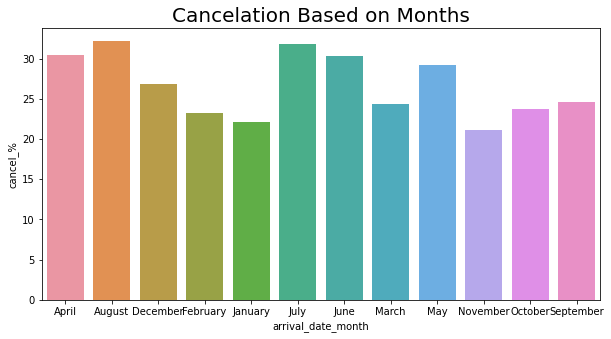

In [27]:
plt.figure(figsize = (10,5))
sns.barplot(x = z.index, y = z['cancel_%']).set_title("Cancelation Based on Months" , fontsize = 20)
plt.show()

**Inference :** From the analyzation, in the month of july and august cancelation is done more.

2) Hotels having high cancelation rate

In [28]:
# Lets Select and count the number of cancelled bookings for each hotel.
cancelled_data_over_week_no = df[df['is_canceled'] == 1]
cancel = cancelled_data_over_week_no.groupby('hotel')
a = pd.DataFrame(cancel.size()).rename(columns = {0:'total_cancelled_bookings'})

# Count the total number of bookings for each type of hotel
grouped_hotel = df.groupby('hotel')
total_booking_done = grouped_hotel.size()
b = pd.DataFrame(total_booking_done).rename(columns = {0: 'total_bookings'})
c = pd.concat([a,b], axis = 1)

# Calculating cancel percentage 
c['cancel%'] = round((c['total_cancelled_bookings']/c['total_bookings'])*100,2)
c

,total_cancelled_bookings,total_bookings,cancel%
hotel,,,
City Hotel,16047,53418,30.04
Resort Hotel,7974,33958,23.48


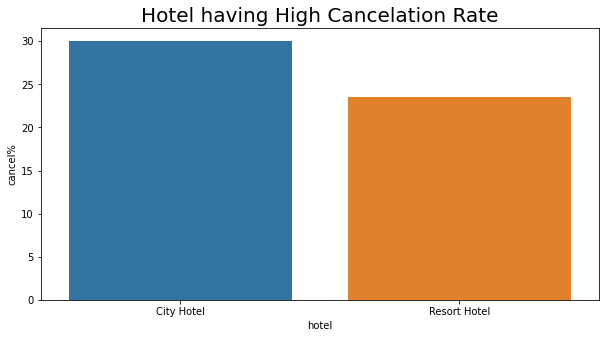

In [29]:
plt.figure(figsize = (10,5))
sns.barplot(x = c.index, y = c['cancel%']).set_title("Hotel having High Cancelation Rate" , fontsize = 20)
plt.show()

**Inference :** City hotels have higher cancelation rates (of 30%) compared to resort hotels

**EDA based on Meals**

In [30]:
# categories of meal feature  we have in our data
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

**People at each hotel can choose from four categories of meals which they can book their respective stays with, let's briefly see what those are**
*   Undefined/SC – no meal package
*   BB – Bed & Breakfast
*   HB – Half board (breakfast and one other meal – usually dinner)
*   FB – Full board (breakfast, lunch and dinner)

In [31]:
# Group them according to City and Resort Hotels
meal_category = df.groupby(['hotel'])['meal'].value_counts()
meal_category

hotel         meal     
City Hotel    BB           41220
              SC            9396
              HB            2791
              FB              11
Resort Hotel  BB           26742
              HB            6292
              Undefined      492
              FB             348
              SC              84
Name: meal, dtype: int64

Text(0.5, 1.0, 'Meals opted in each hotels')

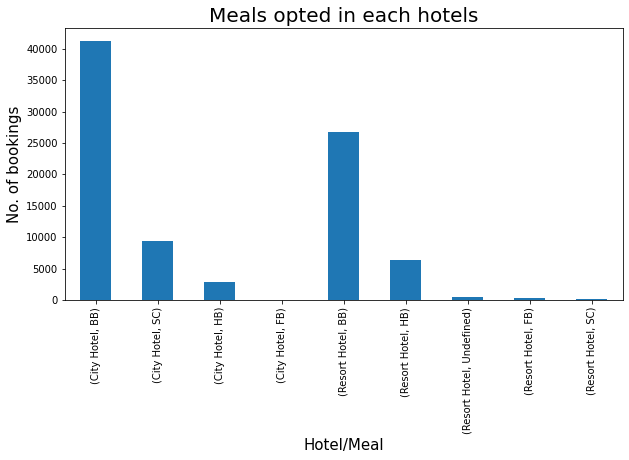

In [32]:
plt.rcParams['figure.figsize'] = (10,5)
meal_category.plot(kind= 'bar')

plt.ylabel('No. of bookings',fontsize = 15)
plt.xlabel('Hotel/Meal',fontsize = 15)
plt.title('Meals opted in each hotels',fontsize = 20)

**Inference :** Most the peoples prefer to opt BB(Bed & Breakfast) in both city and resort hotels.

From the above chart, let me explain how. We have each hotel with respective food categories and the number of booking that people are doing in each hotel with each meal category, now it is clear that, in Resort Hotel or city Hotel, people mostly prefer to go with the BB-category (i.e., bed and breakfast)

**EDA based on country**

Lets see in which country maximum booking is done

In [33]:
# lets do groupby operation and obtain the value counts
hotel_country = df[df['is_canceled']==0].groupby('country',as_index=True)['hotel'].value_counts()

# sort the values in descending
hotel_country = hotel_country.sort_values(ascending=False)

# create a dataframe from the series
hotel_country_df = pd.DataFrame(hotel_country)

# Rename the only column the dataframe has as the number of bookings
hotel_country_df.columns= ['no of bookings']

#  Top ten countries by bookings
hotel_country_df.head(10)

no of bookings
country hotel                       
PRT     Resort Hotel            9326
        City Hotel              8329
FRA     City Hotel              5866
GBR     Resort Hotel            5218
DEU     City Hotel              3534
GBR     City Hotel              3228
ESP     Resort Hotel            2723
        City Hotel              2666
ITA     City Hotel              1644
IRL     Resort Hotel            1609

Clearly from the data **Portugal** is the highest country for hotel booking (both resort and city hotels) 

**EDA on Agents**

In [34]:
df['agent'].value_counts()

Agent       75187
No agent    12189
Name: agent, dtype: int64

Text(0, 0.5, 'Total Count ')

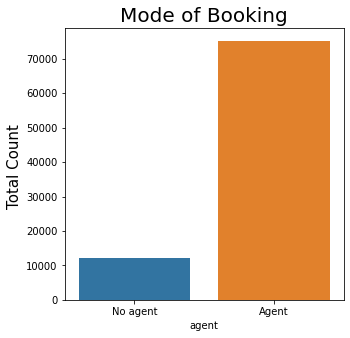

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x = 'agent').set_title('Mode of Booking', fontsize = 20)
plt.ylabel('Total Count ',fontsize = 15)

**Inference :** Most of the bookings were done with the help of agents

**Summary**
1.	Data Clean up:

a)	Created the function to find out the percentage of Null Values and visualized using bar plot.

b)	Tackled all the Null values and handling of the missing data’s were done.
2.	EDA performing:

a)	EDA Based on Cancelation Bookings:

*	Performed the bookings cancelled based on months.

* Performed hotel which has high cancelation rate.

b)	EDA based on Meal category:

*	Performed EDA on which meal category was booked in each of the hotel.

c)	EDA based on Country:

*	Performed EDA on which country the highest booking was made.

d)	EDA Based on agents:

*	Performed EDA, whether bookings involved the help of agents or not?
